## Sample Analysis for Tracker Observables

Begin by importing the allmighty `numpy` and `pyplot`

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplot

Now we will import the `numpy` arrays containing the simulation data. The `*_details` array contains the weight of each event and the energy deposited in each scintillator and the calorimeter for said event. The `*_images` array contains the 25x25 tracker images for each event. For each event, there are four tracker images. The way to read the data is that the `nth` event has `weight` in `*_details[n,0]`, scintillator history `*_details[n,1:9]`, calorimeter energy `*_details[n,10]`, and `*_images[:,:,n]`, `*_images[:,:,n+1]`, `*_images[:,:,n+2]`, `*_images[:,:,n+3]` are the four tracker iamges corresponding with the order in which the trackers are reached from the LHC. The `weight` contained in `*_details[n,0]` only takes into account the relative weight of neutrino interactions in the lead to the neutrino interactions in the tungsten.

In [2]:
basedir = './'

neutrino_details = np.load(basedir + 'neutrino_details.npy')
neutrino_images  = np.load(basedir + 'neutrino_images.npy')

# muon_details     = np.load(basedir + 'muon_details.npy')
# muon_images      = np.load(basedir + 'muon_images.npy')

Here is some example code which shows how to quickly interface with the arrays.

In [3]:
n = 5 # This specifies that we will pull the 5th event

# This chunk gives the pattern of the scintillator signal for the nth event.

# We consider the scintillator 'hit' if the energy deposited exceeds the threshold.
threshold = 10**-4 # Specifies an energy threshold of 10**-4 GeV (100 keV) for the scintillators

# We use strictly greater than so that threshold = 0 does not include scintillators with zero energy
scintillator_pattern = neutrino_details[n, 1:10] > threshold
print('The scintillator pattern of the event ' + str(n) + ' is: ' + str(scintillator_pattern) + '.')

# This line gives the calorimeter energy of the sctinillator signal for the nth event.
calorimeter_energy = neutrino_details[n, 10]
print('The energy deposited in the calorimeter for the event ' + str(n) + ' is: ' + str(calorimeter_energy) + ' GeV.\n')

# Let us see how many events match the scintillator pattern where all but the first scintillator is hit
pattern    = [0, 0, 1, 1, 1, 1, 1, 1, 1]
entries    = [n+1 for n in range(9)]
threshold  = 10**-4 
matched_mask = np.sum((neutrino_details[:,entries] > threshold) == pattern,1) == len(entries)
matched_count = np.sum(matched_mask)
print('There are ' + str(matched_count) + ' events matching the scintillator pattern.')

# Now, how many of these events also deposit more than 1 GeV in the calorimeter?
calorimeterCut = 1 # Specifies the cut on the calorimeter energy to be 1 GeV
matched_calCut = np.sum(neutrino_details[matched_mask, 10] > calorimeterCut)
print('There are ' + str(matched_calCut) + ' events matching the scintillator pattern and passing the calorimeter cut.')

The scintillator pattern of the event 5 is: [False False  True  True  True  True  True  True  True].
The energy deposited in the calorimeter for the event 5 is: 0.442003905773163 GeV.

There are 8842 events matching the scintillator pattern.
There are 4456 events matching the scintillator pattern and passing the calorimeter cut.


Here are some useful functions for analyzing the data contained in the arrays.

 - `plotTrackers(n, images)` plots the tracker images for the `nth` event contained in `images`.
 - `matchedEvents(details, pattern, entries, calorimeterCut)` returns the indicies of which events in `details` have the scintillator pattern specified by `pattern` and `entries` and exceeding the calorimeter energy specified by `calorimeterCut`.
 - `matchedCounts(details, pattern, entries, calorimeterCut)` returns the number of events found by `matchedEvents`.

In [4]:
def plotTrackers(n, images):
    # n - event for which we want to plot the trackers
    # images - the array of tracker images
    
    # Setup some nice axes for the tracker images
    x0 = 0.01
    x4 = 0.99
    y0 = 0.04
    y1 = 0.96
    figsize=(16,4)

    fig = pyplot.figure(figsize=figsize)
    
    width  = (x4-x0)/4
    height = y1-y0
    ax1 = fig.add_axes([x0 + 0*width, y0, width, height])
    ax2 = fig.add_axes([x0 + 1*width, y0, width, height])
    ax3 = fig.add_axes([x0 + 2*width, y0, width, height])
    ax4 = fig.add_axes([x0 + 3*width, y0, width, height])
    
    # Plot the tracker images
    ax1.pcolor(images[:,:,n])
    ax2.pcolor(images[:,:,n+1])
    ax3.pcolor(images[:,:,n+2])
    ax4.pcolor(images[:,:,n+3])
    
    # Remove ticks to make them pretty
    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xticks([])
    
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    
    # Return figure so user can manipulate or save the plots
    return fig

def matchedEvents(details, pattern, entries, calorimeterCut = 0, threshold = 10**-4):
    # details - the numpy array containing all of the scintillator and calorimeter energy
    # pattern - specifies the required pattern of hits for the scintillators specified by entries
    # entries - specifies the scintillators for the pattern
    # calorimeterCut - specifies the requirement on the energy deposited in the calorimeter
    # threshold - specifies the threshold on the energy for the scintillators to fire
    
    matched_mask = np.sum((details[:,entries] > threshold) == pattern,1) == len(entries)
    
    return np.where(details[matched_mask, 10] >= calorimeterCut)[0]

def matchedCount(details, pattern, entries, calorimeterCut = 0, threshold = 10**-4):
    # See matchedEvents
    return len(matchedEvents(details, pattern, entries, calorimeterCut = 0, threshold = 10**-4))


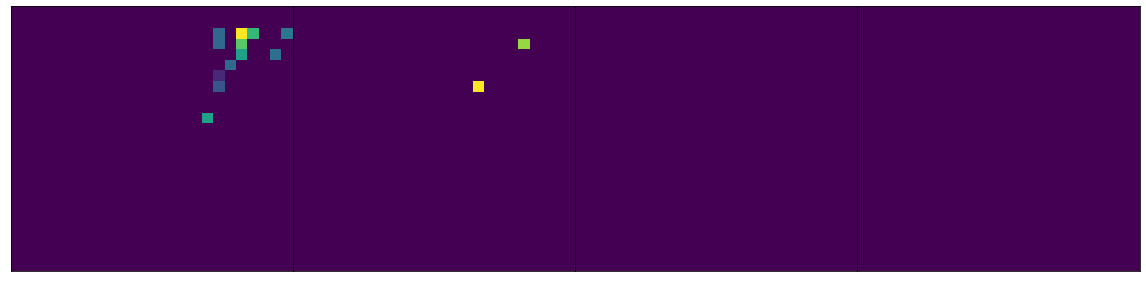

In [5]:
plotTrackers(2, neutrino_images); # The semi-colon suppresses the returned figure from plotting again

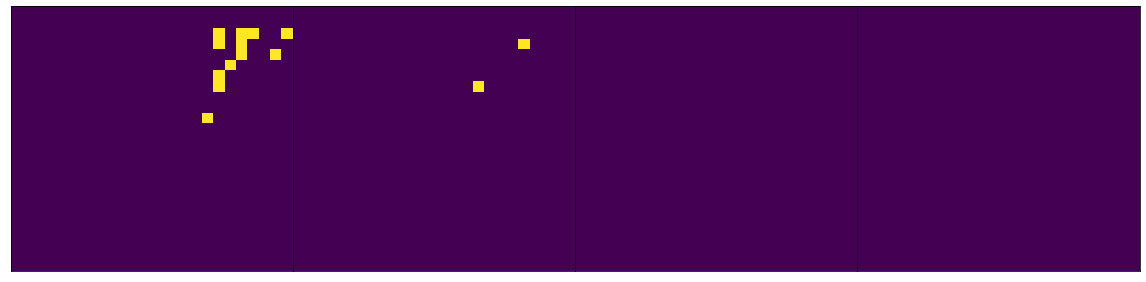

In [6]:
# A simple > sign can make the hitting in the tracker binary
plotTrackers(2, neutrino_images > 0);

Event Number 853


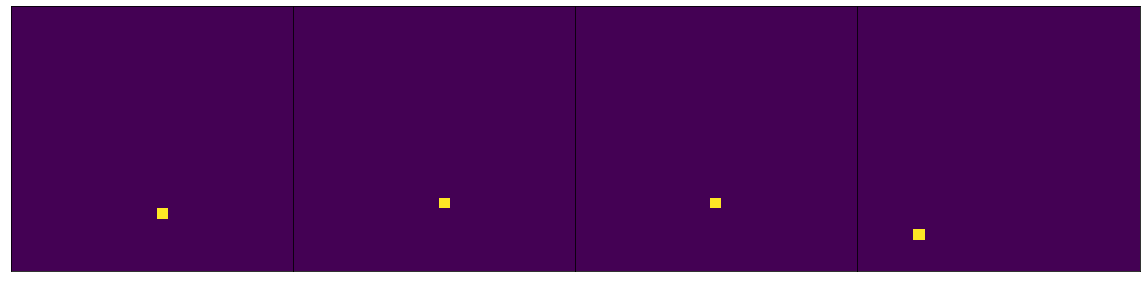

Event Number 855


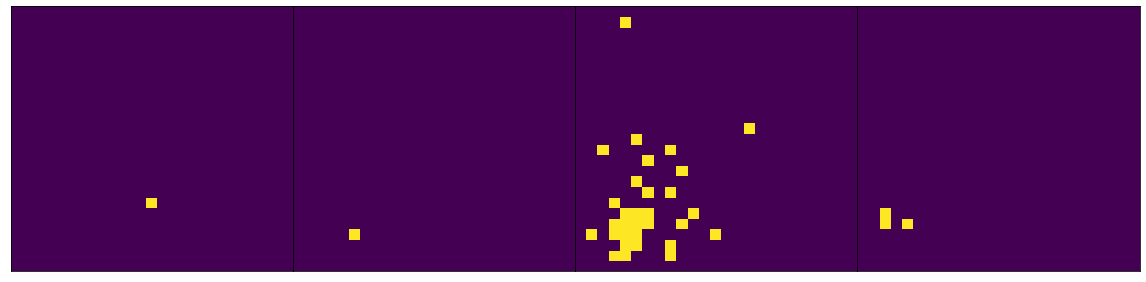

Event Number 856


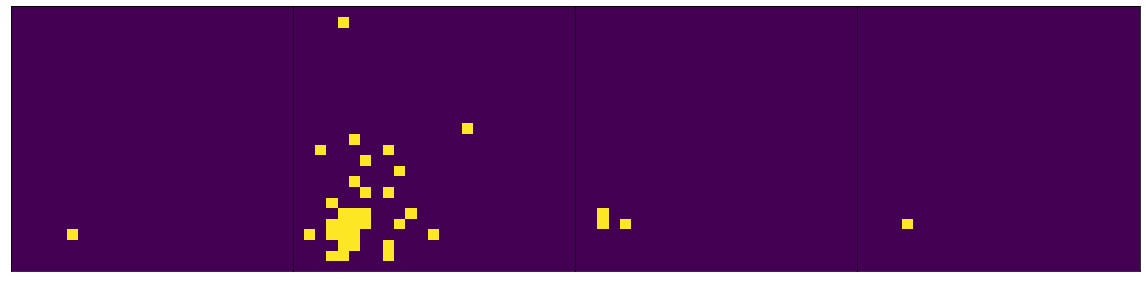

Event Number 858


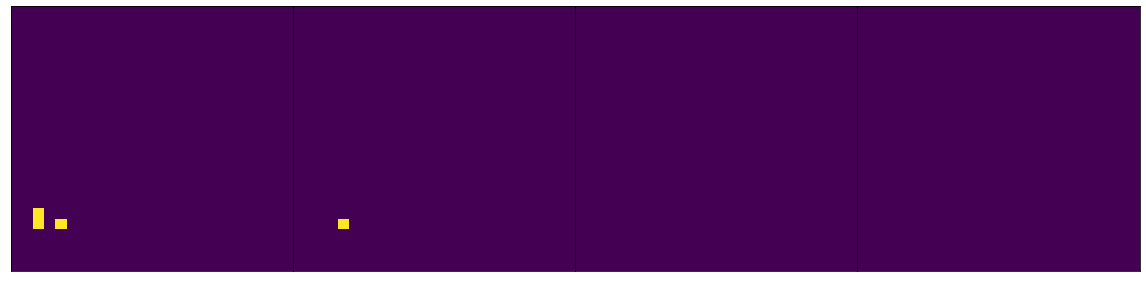

Event Number 860


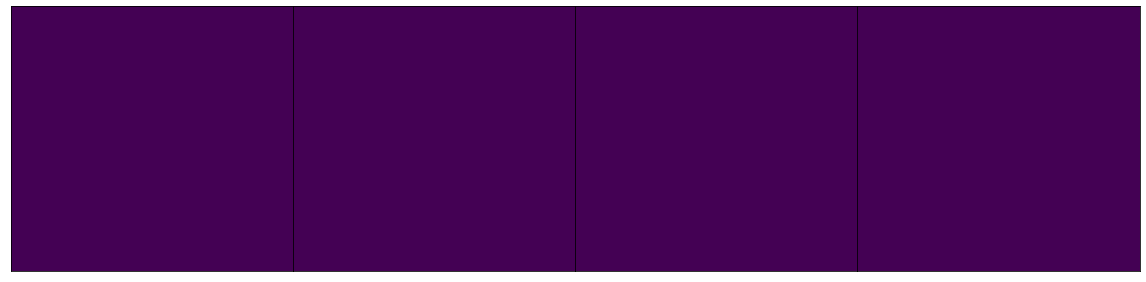

In [7]:
# Let's combine the above functions to plot the trackers for each event matching
#  the pattern [0, 0, 1, 1, 1, 1, 1, 1, 1] and passing the calorimeter cut of 10 GeV.
pattern = [0, 0, 1, 1, 1, 1, 1, 1, 1]
entries = [n+1 for n in range(9)]

events = matchedEvents(neutrino_details, pattern, entries, calorimeterCut = 1)

# Plot 5 random events
for event in events[276:281]:
    print('Event Number ' + str(event))
    plotTrackers(event, neutrino_images > 0)
    pyplot.show()